In [1]:
import requests
import time
import json
from bs4 import BeautifulSoup
import re
URL = 'https://www.dcard.tw/topics/保險?latest=true'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}


total_text = []
for i in range(30,210,30):
    filename = 'insurance' + str(i)
    params = {'field': 'topics',
    'query': '保險'.encode("utf8"),
    'sort': 'created',
    'offset': i,
    'since': 0}
    URL = 'https://www.dcard.tw/_api/search/posts?field=topics&query=%E4%BF%9D%E9%9A%AA&sort=created&offset={}&since=0'.format(i)
    resp = requests.get(URL, headers=headers,params=params)
    resp.encoding = "utf8"
#soup = BeautifulSoup(resp.text, 'html.parser')
#     try:
#         save_path  = '/Users/Dennis/data_science/python/dcard_insurance'
#         complete_name = os.path.join(save_path, filename+".json") 
#         with open(save_path, 'wb+') as op:
#             op.write(json.dumps(data, indent=4, ensure_ascii=False).encode('utf-8'))
#             print('爬取完成~', filename + '.json', '輸出成功！')
#             op.close()
#     except Exception as err:
#         print(filename + '.json', '輸出失敗 :(')
#         print('error message:', err)
    total_text.append(resp.text)


In [2]:
len(total_text)
data = json.loads(json.dumps(total_text))

In [3]:
import pandas as pd

In [4]:
# df ={}
# df['id'] = article['id']
# df['title'] = article['title']
# df['excerpt'] = article['excerpt']
# df['creat_time'] = article['createdAt']
# df['update_time'] = article['updatedAt']
# df['likeCount'] = article['likeCount']
# df['commentCount'] = article['commentCount']

In [5]:
article = json.loads(data[0])
df = pd.DataFrame(article)
index_ls = []
for i in range(1 , len(data)):
    article = json.loads(data[i])
    df_new = pd.DataFrame(article)
    df = df.append(df_new)
for i in range(0,30*len(data)):
    index_ls.append(i)
df.index = index_ls
url_ls = []
for i in range(len(df)):
    url = 'https://www.dcard.tw/_api/posts/{}/comments'.format(df.id[i])#'https://www.dcard.tw/f/{}/p/{}-{}'.format(df.forumName[i],df.id[i] , df.title[i])
    url_ls.append(url)
df.head()

,anonymousDepartment,anonymousSchool,collected,collectionCount,commentCount,createdAt,currentMember,department,excerpt,forumAlias,...,replyId,replyTitle,school,subscribed,supportedReactions,tags,title,topics,updatedAt,withNickname
0,False,False,False,0,7,2019-01-29T11:34:11.242Z,False,skenoa,要好的朋友推了一份 月繳8000多的投資型保單，初接觸保險的我聽的一愣一愣的，就保下去了。也...,money,...,None,None,skenoa,False,None,[],買了人情保單怎麼退,[保險],2019-01-29T11:34:11.242Z,True
1,True,False,False,0,14,2019-01-28T16:45:18.561Z,False,NaN,想問這裡的各位專家，為什麼各保險網與此理財板，都那麼多的保經，然後都沒有什麼太多單一公司的壽...,money,...,None,None,東吳大學,False,None,[HIDE_THUMBNAIL],保經與單一壽險業務的差別？,[保險],2019-01-28T16:45:18.561Z,False
2,True,False,False,0,5,2019-01-28T10:58:07.612Z,False,NaN,想問問旅遊經驗豐富、或者是一類組主修財務類（？）的大家，如果用信用卡刷了團費，但是出遊前一天...,travel,...,None,None,臺北醫學大學,False,None,[],跟團旅費賠償,"[旅遊, 保險, 賠償, 旅行社]",2019-01-28T10:58:07.612Z,False
3,True,True,False,0,7,2019-01-28T08:41:27.042Z,False,NaN,昨天失眠整晚，早上看見一組從十二月中就開始每週打來一次的電話號碼，想說會不會真的是要緊事就接...,mood,...,None,None,NaN,False,None,[HIDE_THUMBNAIL],電話行銷退保,[保險],2019-01-28T08:41:27.042Z,False
4,True,False,False,0,11,2019-01-27T13:20:40.3Z,False,NaN,國泰新出的益美利加美元保單 有4%回饋 3年期 不解約可以放終身 請問這張保單好嗎,money,...,None,None,元智大學,False,None,[HIDE_THUMBNAIL],國泰美元保單,"[外匯, 保險, 外幣]",2019-01-27T13:20:40.3Z,False


In [6]:
df.columns

Index(['anonymousDepartment', 'anonymousSchool', 'collected',
       'collectionCount', 'commentCount', 'createdAt', 'currentMember',
       'department', 'excerpt', 'forumAlias', 'forumId', 'forumName', 'gender',
       'hidden', 'id', 'likeCount', 'liked', 'media', 'newComment', 'pinned',
       'postAvatar', 'reacted', 'reactions', 'read', 'replyId', 'replyTitle',
       'school', 'subscribed', 'supportedReactions', 'tags', 'title', 'topics',
       'updatedAt', 'withNickname'],
      dtype='object')

## 清一下資料

In [7]:
df = df.drop(['department' , 'reacted' , 'withNickname','replyTitle','replyId','supportedReactions'],axis = 1)
df = df.drop(['anonymousDepartment','anonymousSchool','collected','currentMember','forumAlias','forumId','hidden','liked','media','newComment','pinned','postAvatar','reactions','read'],axis =1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
collectionCount    180 non-null int64
commentCount       180 non-null int64
createdAt          180 non-null object
excerpt            180 non-null object
forumName          180 non-null object
gender             180 non-null object
id                 180 non-null int64
likeCount          180 non-null int64
school             169 non-null object
subscribed         180 non-null bool
tags               180 non-null object
title              180 non-null object
topics             180 non-null object
updatedAt          180 non-null object
dtypes: bool(1), int64(4), object(9)
memory usage: 24.9+ KB


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, '評論數')

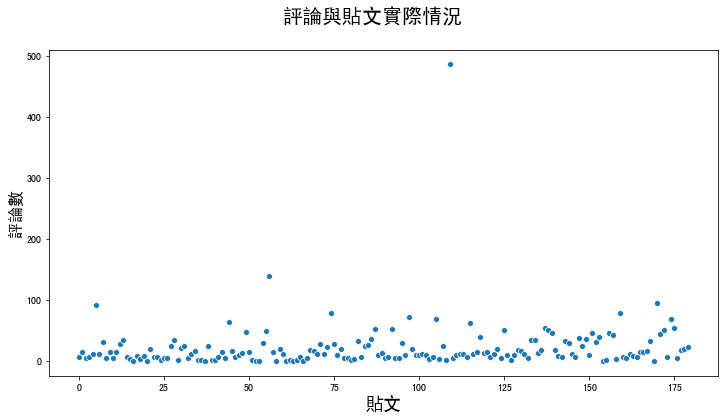

In [10]:
fig = plt.figure(figsize = (12,6))
fig.suptitle('評論與貼文實際情況', fontsize=20)
plt.xlabel('貼文', fontsize=18)
sns.scatterplot(x = df.index , y = df.commentCount)
plt.ylabel('評論數', fontsize=16,)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, '評論數')

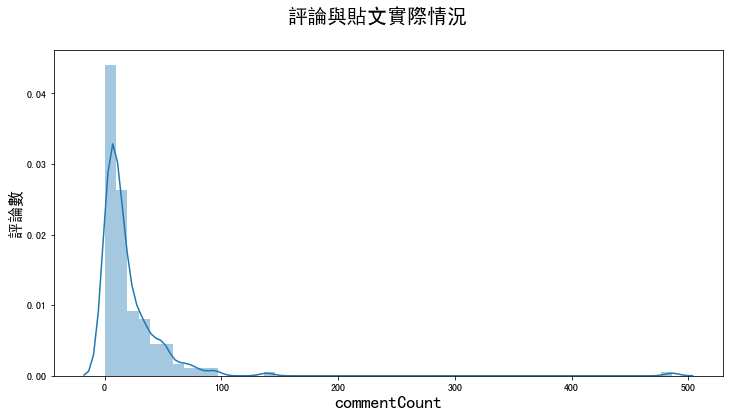

In [23]:
fig = plt.figure(figsize = (12,6))
fig.suptitle('評論與貼文實際情況', fontsize=20)
plt.xlabel('貼文', fontsize=18)
sns.distplot(df.commentCount)
plt.ylabel('評論數', fontsize=16,)

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, '評論數')

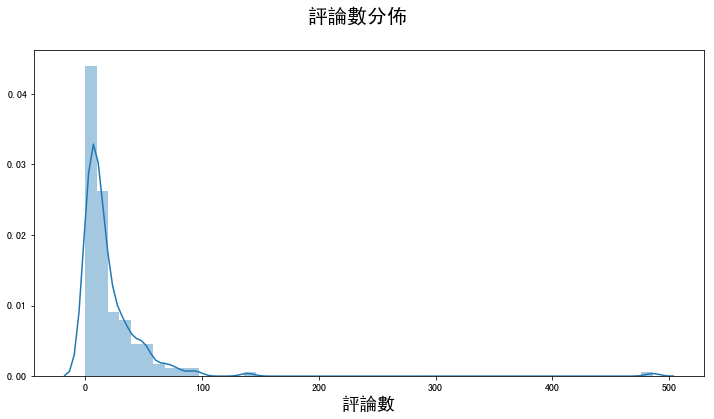

In [11]:
fig = plt.figure(figsize = (12,6))
fig.suptitle('評論數分佈', fontsize=20)
sns.distplot(df.commentCount)
plt.xlabel('評論數', fontsize=18)

In [12]:
# df.sort_values(by = df.commentCount)
df[df.commentCount > 400]

,collectionCount,commentCount,createdAt,excerpt,forumName,gender,id,likeCount,school,subscribed,tags,title,topics,updatedAt
109,0,486,2018-07-29T14:33:22.689Z,-更新-，突然那麼多人回應 真的很謝謝大家，沒辦法一一回覆 在此統一回覆一下，有許多人回應闡...,心情,F,229339558,5626,國立屏東大學,False,[],#更#圖 是怪我爸太早死？（文長）-保險沒告訴你的事,"[長照險, 保險, 理賠, 父親節, 殘扶險]",2018-07-31T03:37:24.885Z


In [25]:
10/12

0.8333333333333334

偶爾會有能夠引起大家注意的貼文，比如上面這篇，否則討論度以dcard來說都不是很大

In [13]:
df.sort_values('likeCount',ascending=False).title.head()

109               #更#圖 是怪我爸太早死？（文長）-保險沒告訴你的事
49                       為何因普悠瑪身故孩童保險只理賠170元
54                            真心推薦大家都要買車碰車險!
100    #德國 #簽證 2018 德國交換學生簽證 | 簽證流程、護照借出報給你知
175          #保險 關於儲蓄險的迷思"你知道事實上保險公司沒賣儲蓄險嗎？"
Name: title, dtype: object

前30篇最熱門的討論，基本上我們可以推敲出給愛心多-->關注度大，也代表許多人點進貼文，如果把這些因素參考進來，年輕人注意：
* 保險的迷思
* 「儲蓄險」這個類別，幾乎每篇都聊到了儲蓄險
* 個人故事談保險
* 保險業務朋友
* 有沒有買保險的必要？

接下來我們用文字雲驗證一下：

(-0.5, 399.5, 199.5, -0.5)

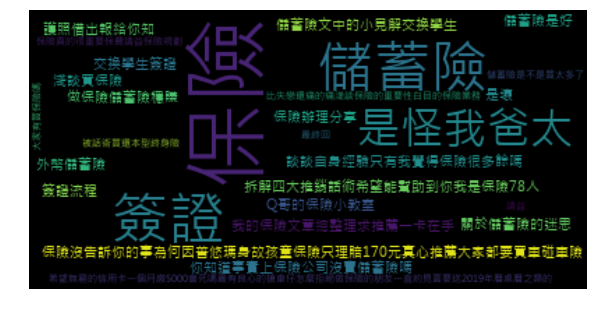

In [14]:
from wordcloud import WordCloud
title = ''

c = df.sort_values('likeCount',ascending=False).title.head(30)
for tit in c:
    title += tit
removeword = ['德國','文長','早死']
for word in removeword:
    title = title.replace(word , '')
font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

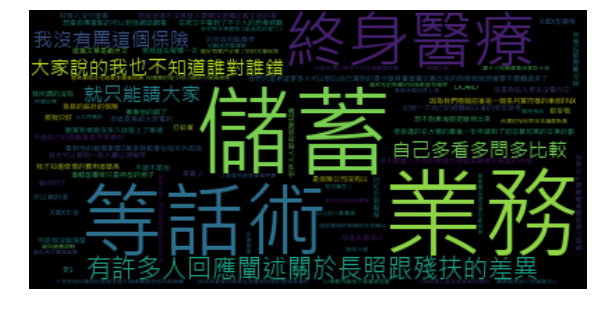

In [22]:
title = ''

c = df.sort_values('likeCount',ascending=False).excerpt.head(30)
for tit in c:
    title += tit
removeword = ['更新','真的很謝謝大家','而且','回覆','儲蓄險','大家好','突然那麼多人回應','沒辦法一一','在此統一一下']
for word in removeword:
    title = title.replace(word , '')
font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

那麼內容呢？另外由於第一篇文章實在嚴重干擾分析，故先暫時予以剔除。
不過這篇文章也很有參考價值，以商品來說是在探討長照險與殘扶，似乎是篇傷心的故事
而內容則偏重提到
* 儲蓄
* 業務
* 話術

看出年輕人似乎對保險業觀感不佳，所以業務推行之時我們一定要思考如何扭轉這種印象為首要，不然TA不買單
由上面的分析結果可以宣導保險的重要性，另外這是一把雙面刃，由於觀感不佳影響，如果想要扭轉就**不能變相成為推銷。**

而是協助客戶比較面臨風險時他所能採取的措施，以及保險這項措施的優缺點讓他評斷。

In [120]:
df.columns

Index(['collectionCount', 'commentCount', 'createdAt', 'excerpt', 'forumName',
       'gender', 'id', 'likeCount', 'school', 'subscribed', 'tags', 'title',
       'topics', 'updatedAt'],
      dtype='object')

In [127]:
print('學校熱度')
df.school.value_counts().head(10)

學校熱度


淡江大學          7
逢甲大學          5
國立成功大學        5
國立金門大學        5
國立屏東大學        4
國立交通大學        4
國立高雄第一科技大學    4
國立勤益科技大學      4
義守大學          4
東吳大學          3
Name: school, dtype: int64

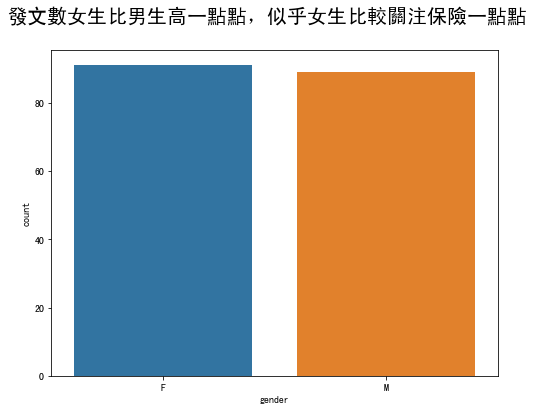

In [136]:
fig  = plt.figure(figsize = (8,6))
fig.suptitle(
    '發文數女生比男生高一點點，似乎女生比較關注保險一點點',fontsize = 20)
sns.countplot(df.gender)

# 接下來我們看看熱度與時間的關係，一樣移除離群值

In [154]:
df1 = df.drop([99])

Text(0.5, 0, '發文時間')

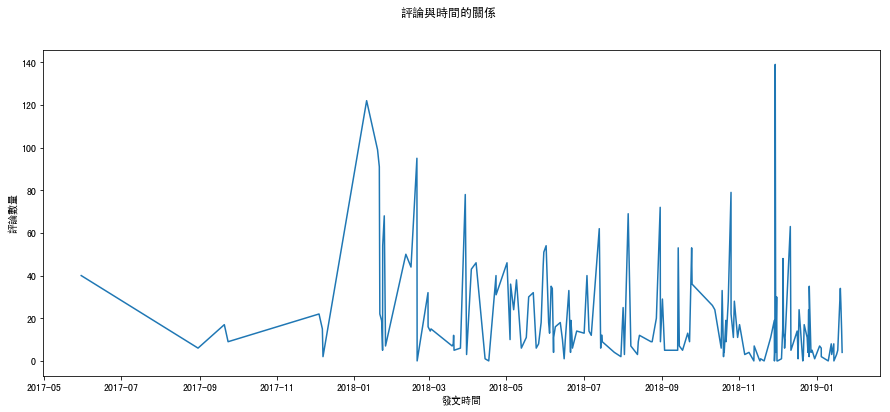

In [155]:
import datetime
fig = plt.figure(figsize = (15,6))
fig.suptitle('評論與時間的關係')
sns.lineplot(x = pd.to_datetime(df1.createdAt),y=df1.commentCount)
plt.ylabel('評論數量')
plt.xlabel('發文時間')

基本上還是有一些討論熱絡的地方，顯示年輕人不是毫無興趣

Text(0.5, 0, '發文時間')

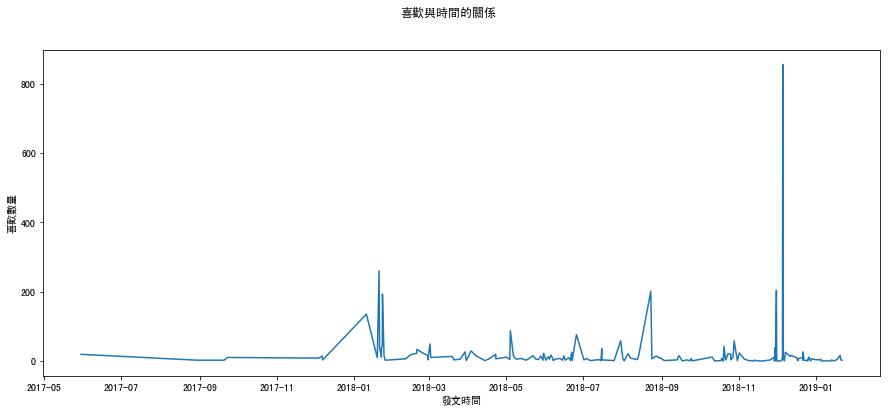

In [156]:
fig = plt.figure(figsize = (15,6))
fig.suptitle('喜歡與時間的關係')
sns.lineplot(x = pd.to_datetime(df1.createdAt),y=df1.likeCount)
plt.ylabel('喜歡數量')
plt.xlabel('發文時間')

貼文基本上愛心都不多，可見貼文分類常常是問題，偶爾幾篇教學文章的愛心才會竄高

# 自然語言處理

In [157]:
import pandas
mydata = pandas.read_csv("/Users/Dennis/data_science/text_asset/SentimentDict.csv")
# degree-1 => 乘 1.8
# 列印degree_dict長度
degree_dict = {}

# 列印出positive詞庫個數
positives_set=set(mydata['positive'])
print(len(positives_set))
# 5006
# 列印出negative詞庫個數
negatives_set = set(mydata['negative'])
print(len(negatives_set))
# 4686

# 列印出否定詞詞庫個數
not_set = set(mydata['not'])
print(len(not_set))
# 214

for word in mydata['degree-1']:
    degree_dict[word] = 1.8
print(len(degree_dict))
# 69
# degree-2 => 乘 1.6
for word in mydata['degree-2']:
    degree_dict[word] = 1.6
print(len(degree_dict))
# 112
# degree-3 => 乘 1.4
for word in mydata['degree-3']:
    degree_dict[word] = 1.4
print(len(degree_dict))
# 146
# degree-4 => 乘 1.2
for word in mydata['degree-4']:
    degree_dict[word] = 1.2
print(len(degree_dict))
# 174
# degree-5 => 乘 1.1
for word in mydata['degree-5']:
    degree_dict[word] = 1.1
print(len(degree_dict))
# 186
# degree-6 => 乘 0.9
for word in mydata['degree-6']:
    degree_dict[word] = 0.9
print(len(degree_dict))
# 213

5006
4686
214
69
112
146
174
186
213


In [183]:
def hasOpposite(wordlist):
    for word in wordlist:
        if word in not_set:
            return True
    return False

def getDegree(wordlist):
    degree = 1
    for word in wordlist:
        if word in degree_dict:
            degree = degree_dict[word]
    return degree

import jieba
def analyze(text):
    token = list(jieba.cut(text))
    sum = 0
    for word in token:
        if word.lower() in positives_set:
            sum +=1
        elif word.lower() in negatives_set:
            sum -= 1
    if hasOpposite:
        sum = -sum
    sum = sum * getDegree(token)
    return sum
def sentiment_analyze(text):
    sentiment = '一般'
    score = analyze(text)
    print('情感分數：' ,score )
    if score > 0:
        sentiment = '正向'
    elif score < 0 :
        sentiment = '負向'
    return sentiment

def sentiment_analysis(text):
    sentiment = '一般'
    score = analyze(text)
    #print('情感分數：' ,score )
    if score > 0:
        sentiment = '正向'
    elif score < 0 :
        sentiment = '負向'
    return score

def article_analysis(board ,show = False):
    select_board = TextSelector(Main)
    文章數目  = len(select_board.articles)
    # content = selector.getResponseContent(3)
    # content
    sum = 0
    for i in range(文章數目):
        content = select_board.getResponseContent(i)
        response_num = select_board.getResponse(i)
        score = sentiment_analysis(content)
        avg_score = round(score/response_num , 2)
        sum += avg_score
        title = select_board.getTitle(sheet=i)
        if show == True:
            print('文章:{}的平均分數是：{}'.format(title , avg_score))
    return sum
def hasOpposite(wordlist):
    for word in wordlist:
        if word in not_set:
            return True
    return False

def getDegree(wordlist):
    degree = 1
    for word in wordlist:
        if word in degree_dict:
            degree = degree_dict[word]
    return degree
import jieba
def analyze(text):
    token = list(jieba.cut(text))
    sum = 0
    for word in token:
        if word.lower() in positives_set:
            sum +=1
        elif word.lower() in negatives_set:
            sum -= 1
    if hasOpposite:
        sum = -sum
    sum = sum * getDegree(token)
    return sum
def sentiment_analyze(text):
    sentiment = '一般'
    score = round(analyze(text),2)
    print('情感分數：' ,score )
    if score > 0:
        sentiment = '正向'
    elif score < 0 :
        sentiment = '負向'
    return sentiment

def sentiment_analysis(text):
    sentiment = '一般'
    score = analyze(text)
    #print('情感分數：' ,score )
    if score > 0:
        sentiment = '正向'
    elif score < 0 :
        sentiment = '負向'
    return score

In [168]:
text = df.excerpt[99]
text

'-更新-，突然那麼多人回應 真的很謝謝大家，沒辦法一一回覆 在此統一回覆一下，有許多人回應闡述關於長照跟殘扶的差異 大家說的我也不知道誰對誰錯，就只能請大家 自己多看多問多比較，我沒有罵這個保險 我們只是希望更多人可以明白自己買到的是什麼'

In [189]:
c = df.sort_values('likeCount',ascending=False).excerpt.head(30)
c = c.loc[39:]
for tit in c:
    print('正負向：',sentiment_analyze(tit))

情感分數： -4
正負向： 負向
情感分數： -9.6
正負向： 負向
情感分數： -1.6
正負向： 負向
情感分數： -5.4
正負向： 負向
情感分數： -8.4
正負向： 負向
情感分數： -16.0
正負向： 負向
情感分數： -13.5
正負向： 負向
情感分數： -8.4
正負向： 負向
情感分數： -12.8
正負向： 負向
情感分數： -12.8
正負向： 負向
情感分數： -8.4
正負向： 負向
情感分數： -16.8
正負向： 負向
情感分數： -19.8
正負向： 負向
情感分數： -6.0
正負向： 負向
情感分數： -1.8
正負向： 負向
情感分數： -5.6
正負向： 負向
情感分數： -13.2
正負向： 負向
情感分數： -3
正負向： 負向
情感分數： -9
正負向： 負向
情感分數： -4
正負向： 負向
情感分數： -1
正負向： 負向
情感分數： -11.2
正負向： 負向
情感分數： -12.6
正負向： 負向
情感分數： -7.2
正負向： 負向
情感分數： 0.0
正負向： 一般
情感分數： -3.6
正負向： 負向
情感分數： -1.8
正負向： 負向
情感分數： -6
正負向： 負向
情感分數： -14.4
正負向： 負向
